# Regression Practice
## 과제 안내 
- 답안을 작성하여 ipynb 파일로 구글 드라이브 \[Assignment\] - \[개인 폴더\]로 업로드하시면 됩니다.  
- 출력 예시는 각 셀 하단에 수록되어 있습니다.
- 출력 결과와 예시가 완전히 일치할 필요는 없습니다! 문제의 조건에만 부합하면 됩니다.

# Practice Introduction
이번 시간에는 캘리포니아 주택 가격 데이터를 활용하여 주택 정보가 주어지면 그것을 활용하여 주택 가격을 예측해봅시다.

과정은 아래와 같습니다.  
1. 데이터셋 불러오기 및 확인: 주택 가격 데이터셋을 불러오고, 데이터셋의 구조를 파악합니다.  
2. 데이터셋 분할: 모델 학습을 위해 불러온 데이터셋을 train data와 validation data로 분할합니다.  
3. 모델 학습: 앞서 분할한 데이터를 이용해 모델을 학습시킵니다.  
4. 모델 평가: 모델이 올바르게 학습하였는지, 평가해 봅시다.  



# Practice

## P.5-1 데이터셋 불러오기



주택 가격 문제의 데이터셋은 scikit-learn의 datasets 모듈에 포함되어 있습니다. 본 데이터셋을 불러오겠습니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
housing_dataset = fetch_california_housing()
print("keys---------------------\n")
print(housing_dataset.keys())
print("DESCR---------------------\n")
print(housing_dataset['DESCR'])

keys---------------------

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
DESCR---------------------

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, usin

## P.5-1
선형회귀(Linear Regression) 분석을 위해 한가지 feature를 선정합니다.  
방의 개수(AveRooms)가 많을수록 집의 가격이 높아지지 않을까요?  
한번 산점도(Scatter plot)으로 시각화하여 확인해 봅시다!  

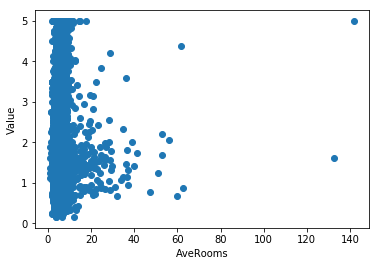

In [96]:
### P.5-1
import pandas as pd
housing_df = pd.DataFrame(data = housing_dataset.data, columns = housing_dataset.feature_names)
housing_df['value'] = housing_dataset.target
plt.scatter(x = housing_df['AveRooms'], y =housing_df['value'])
plt.xlabel('AveRooms')
plt.ylabel('Value')
plt.show()
###

## P.5-2
모델 학습을 위해 AveRooms Feature를 사용합시다!  
AveRooms Feature를 x, target을 y로 가지는 학습 데이터를 만들어봅시다.
- iris_dataset을 x_train, x_test, y_train, y_test로 나누어봅시다.

In [97]:
### P.5-2
X = housing_df['AveRooms']
y = housing_df['value']
x_train, x_test, y_train, y_test = train_test_split(X,y)
###

## P.5-3
선형 회귀(Linear Regression) 모델을 생성해 봅시다.


In [64]:
### P.5-4
housing_line = LinearRegression()
###

In [65]:
### P.5-4
housing_line.fit(x_train.values.reshape(-1,1), y_train)
###

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## P.5-5
모델의 학습이 잘 진행되었는지 확인해봅시다!  
첫번째 test 데이터의 집 값을 예측해봅시다.

In [66]:
### P.5-5
housing_line.predict(x_test.values.reshape(-1,1))[0]
###

2.0133070461590084

## P.5-6
생성한 선형 회귀 모델을 그래프로 시각화하여 봅시다.  
그래프의 기울기와 절편은 어떻게 될까요?

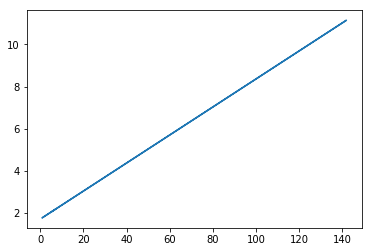

[0.06654913] 1.7072321959075258


In [67]:
### P.5-6
plt.plot(X,housing_line.predict(X.values.reshape(-1,1)))
plt.show()
print(housing_line.coef_, housing_line.intercept_)
###

## P.5-7
방금 생성한 그래프 위에,
test 데이터의 실제 정답(주택 가격)을 산점도로 시각화해봅시다. 

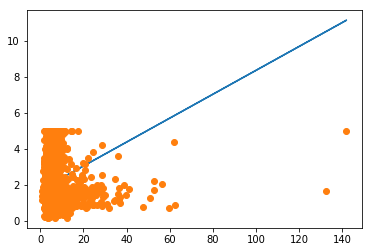

In [68]:
### P.5-7
plt.plot(X,housing_line.predict(X.values.reshape(-1,1)))
plt.plot(X,housing_df['value'],'o')
plt.show()
###

## P.5-8
회귀 분석 모델에 점수를 매길 수 있을까요?
분류 모델에는 정확도(Accuracy)가 있다면, 회귀 모델에는 평균 제곱 오차(MSE, Mean Square Error)가 있습니다.  
생성한 모델의 MSE를 구해봅시다!  

MSE의 설명은 [링크](https://dyndy.tistory.com/179)를 참고해주세요.


In [120]:
### P.5-8
def MSE(y,t):
    return (1/2)*(np.sum(y-t)**2)

MSE(housing_line.predict(x_test.values.reshape(-1,1)),y_test)

###

0.09996210436338564

## P.5-9
다른 Feature를 이용하여 선형 회귀 모델을 제작해봅시다!  
선택하는 feature는 자유입니다.  
AveRooms Feature보다 성능(MSE)의 개선이 있었나요?  

In [117]:
### P.5-9
X2 = housing_df['MedInc']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y)
housing_line_Inc = LinearRegression()
housing_line_Inc.fit(x_train2.values.reshape(-1,1),y_train2)

MSE(housing_line_Inc.predict(x_test2.values.reshape(-1,1)),y_test2)
###

13.022555209500014

## P.5-10
지금까지는 단순선형회귀로 문제를 해결해보고자 했습니다.  
이번에는 다중선형회귀모델로 즉, 여러개의 변수 X를 이용하여 문제를 해결해봅시다.  
적절한 Feature들을 선택하여 다중선형회귀모델을 제작해봅시다!  
이전 모델들보다 MSE의 성능(MSE)이 있었나요? 

In [37]:
### P.5-10
###